In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_df=pd.read_csv("Google_Stock_Price_Train.csv")
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
test_df=pd.read_csv('Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [10]:
train_df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [15]:
train=train_df.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(train)

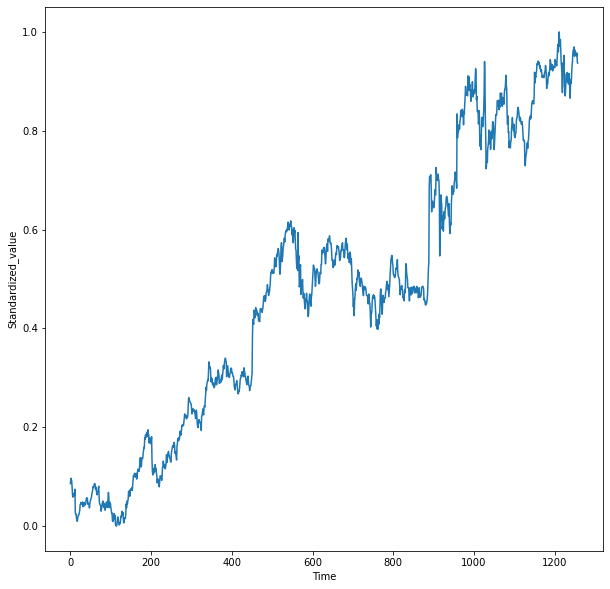

In [18]:
plt.figure(figsize=(10,10))
plt.plot(train_scaled)
plt.ylabel("Standardized_value")
plt.xlabel("Time")
plt.show()

In [20]:
x_train=[]
y_train=[]
time=60
for i in range(time,train_scaled.shape[0]):
    x_train.append(train_scaled[i-time:i,0])
    y_train.append(train_scaled[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [21]:
x_train.shape

(1198, 60)

In [22]:
x_train=np.reshape(x_train, newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [23]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [25]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train,y_train,epochs=100,batch_size=300,validation_split=0.05)

Epoch 1/100
4/4 [==============================] - 7s 690ms/step - loss: 0.2157 - val_loss: 0.3030
Epoch 2/100
4/4 [==============================] - 1s 259ms/step - loss: 0.0474 - val_loss: 0.0010
Epoch 3/100
4/4 [==============================] - 1s 226ms/step - loss: 0.0242 - val_loss: 0.0212
Epoch 4/100
4/4 [==============================] - 1s 263ms/step - loss: 0.0127 - val_loss: 0.0158
Epoch 5/100
4/4 [==============================] - 1s 311ms/step - loss: 0.0083 - val_loss: 0.0499
Epoch 6/100
4/4 [==============================] - 1s 288ms/step - loss: 0.0120 - val_loss: 0.0313
Epoch 7/100
4/4 [==============================] - 1s 326ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 8/100
4/4 [==============================] - 1s 176ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 9/100
4/4 [==============================] - 1s 217ms/step - loss: 0.0049 - val_loss: 0.0012
Epoch 10/100
4/4 [==============================] - 1s 288ms/step - loss: 0.0025 - val_loss: 0.0069
Epoch 11/

4/4 [==============================] - 1s 332ms/step - loss: 8.9938e-04 - val_loss: 8.3716e-04
Epoch 80/100
4/4 [==============================] - 1s 348ms/step - loss: 8.9552e-04 - val_loss: 8.5809e-04
Epoch 81/100
4/4 [==============================] - 1s 344ms/step - loss: 8.8962e-04 - val_loss: 8.7425e-04
Epoch 82/100
4/4 [==============================] - 1s 341ms/step - loss: 8.8802e-04 - val_loss: 8.3719e-04
Epoch 83/100
4/4 [==============================] - 1s 336ms/step - loss: 8.8456e-04 - val_loss: 8.6350e-04
Epoch 84/100
4/4 [==============================] - 1s 307ms/step - loss: 8.7966e-04 - val_loss: 8.2997e-04
Epoch 85/100
4/4 [==============================] - 1s 297ms/step - loss: 8.9000e-04 - val_loss: 8.7113e-04
Epoch 86/100
4/4 [==============================] - 1s 231ms/step - loss: 8.9535e-04 - val_loss: 8.6891e-04
Epoch 87/100
4/4 [==============================] - 1s 240ms/step - loss: 8.8870e-04 - val_loss: 8.2233e-04
Epoch 88/100
4/4 [=======================

In [27]:
data=pd.concat((train_df['Open'],test_df['Open']),axis=0)
test_input=data.iloc[len(data)-len(test_df)-time:].values

In [28]:
test_input.shape

(80,)

In [29]:
test_input=test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [31]:
test_scaled=scaler.transform(test_input)

In [32]:
x_test=[]
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i-time:i,0])

In [33]:
x_test=np.array(x_test)
x_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [34]:
x_test.shape

(20, 60)

In [36]:
x_test=np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [37]:
y_test=test_df.loc[:,"Open"].values
y_test

array([778.81, 788.36, 786.08, 795.26, 806.4 , 807.86, 805.  , 807.14,
       807.48, 807.08, 805.81, 805.12, 806.91, 807.25, 822.3 , 829.62,
       837.81, 834.71, 814.66, 796.86])

In [38]:
y_test.shape

(20,)

In [39]:
output=model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 47ms/step - loss: 650756.5625


In [40]:
y_pred=model.predict(x_test)

1/1 [==============================] - 1s 924ms/step


In [41]:
y_pred=scaler.inverse_transform(y_pred)

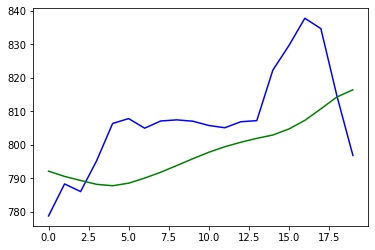

In [42]:
plt.plot(y_test,color='Blue', label="Real price")
plt.plot(y_pred, color='green', label='Predicted')
plt.show()